<a href="https://colab.research.google.com/github/callejas-omar/Metodos-Numericos1/blob/main/InterpolacionNewton13/11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

La interpolación de Newton es un método numérico que se utiliza para construir un polinomio que pase por un conjunto de puntos dados. Es decir, dada una tabla de valores $(x, y)$, la interpolación de Newton encuentra un polinomio que "interpola" o "conecta" estos puntos de la manera más suave posible.

In [32]:
datos = {'x': [0, 1, 2, 3, 4, 5], 'y=F(x)': [-5, 1, 9, 25, 55, 105]}
df = pd.DataFrame(datos)
print(df)

   x  y=F(x)
0  0      -5
1  1       1
2  2       9
3  3      25
4  4      55
5  5     105


En este ejemplo tenemos las siguientes parejas ordenadas: \\
$(0, -5)$ \\
$(1, 1)$ \\
$(2, 9)$ \\
$(3, 25)$ \\
$(4, 55)$  \\
$(5, 105)$ \\

Entonces, al usar la interpolacion de Newton en cualquier $x$ podemos calcular cuanto valdria $y$ en ese valor.

In [33]:
def newton_interpolation(x_values, y_values, x):
  """
  Evalúa el polinomio interpolante de Newton para un valor dado de x.

  Args:
    x_values: Una lista de valores de x.
    y_values: Una lista de valores de y correspondientes a los valores de x.
    x: El valor de x para el que se evaluará el polinomio.

  Returns:
    El valor del polinomio interpolante de Newton en x.
  """
  n = len(x_values)
  # Calcula la tabla de diferencias divididas
  f = np.zeros((n, n))
  f[:, 0] = y_values
  for j in range(1, n):
    for i in range(n - j):
      f[i, j] = (f[i + 1, j - 1] - f[i, j - 1]) / (x_values[i + j] - x_values[i])

  # Evalúa el polinomio
  y = f[0, 0]
  for j in range(1, n):
    term = f[0, j]
    for i in range(j):
      term *= (x - x_values[i])
    y += term

  return y

# Obtén los valores de x e y del DataFrame
x_values = df['x'].values
y_values = df['y=F(x)'].values

# Evalúa el polinomio para un valor dado de x
x = 6  #Valor a cambiar
y = newton_interpolation(x_values, y_values, x)
print(f"El valor del polinomio interpolante de Newton en x = {x} es: {y}")


El valor del polinomio interpolante de Newton en x = 6 es: 181.0


En este caso tomaremos un valor mas que el que aparece en la tabla, es decir, $x = 6$, entonces buscamos $y=F(x)$ aplicando la Interpolacion de Newton. \\
Para este caso, el valor de $F(x)$ cuando $x = 6$ es de $y = F(6) =181 $. \\
Asi quedando la siguiente pareja ordenada $(6, 181)$ \\
Quedando la tabla de la siguiente manera (anexando el valor nuevo que encontramos).

In [35]:
datos2 = {'x': [0, 1, 2, 3, 4, 5, 6], 'y=F(x)': [-5, 1, 9, 25, 55, 105, 181]}
df2 = pd.DataFrame(datos2)
print(df2)

   x  y=F(x)
0  0      -5
1  1       1
2  2       9
3  3      25
4  4      55
5  5     105
6  6     181


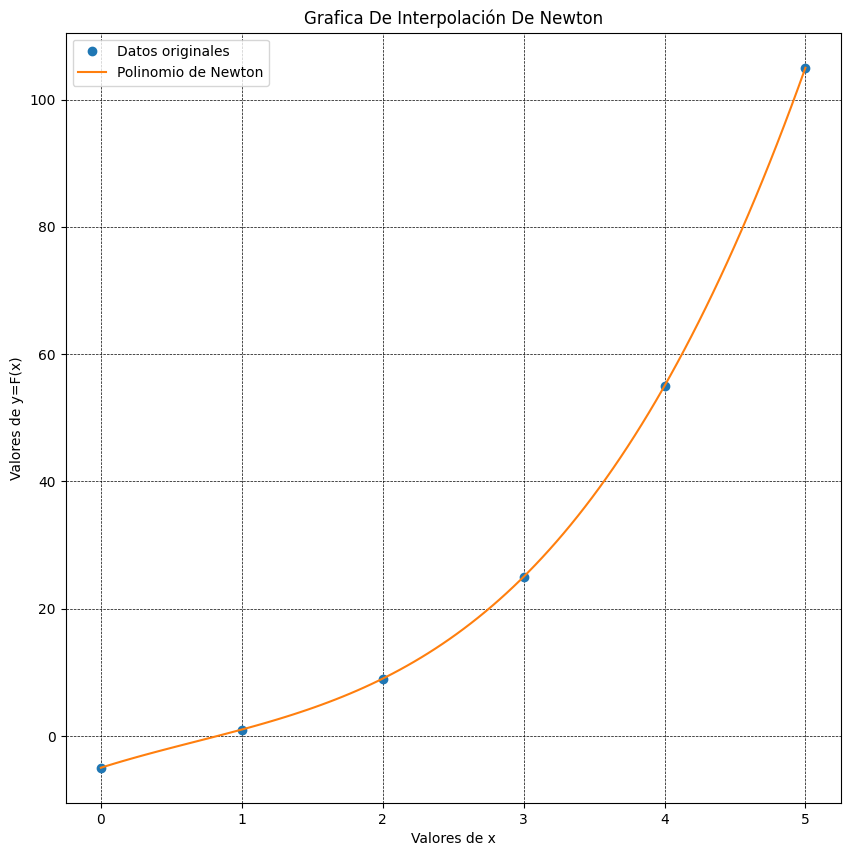

In [42]:

# Obtén los valores de x e y del DataFrame
x_values = df['x'].values
y_values = df['y=F(x)'].values

# Genera puntos para la gráfica del polinomio
x_range = np.linspace(min(x_values), max(x_values), 100)  # 100 puntos en el rango de x
y_interp = [newton_interpolation(x_values, y_values, x) for x in x_range]

# Ajusta el tamaño de la tabla (opcional)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Ajusta el factor de escala según sea necesario
plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura
plt.plot(x_values, y_values, 'o', label='Datos originales')  # Gráfica de los puntos originales
plt.plot(x_range, y_interp, '-', label='Polinomio de Newton')  # Gráfica del polinomio
plt.xlabel('Valores de x')
plt.ylabel('Valores de y=F(x)')
plt.title('Grafica De Interpolación De Newton')
plt.legend()
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
plt.show()

La grafica anterior muestra el trazo de los puntos de la tabla dada originalmente.

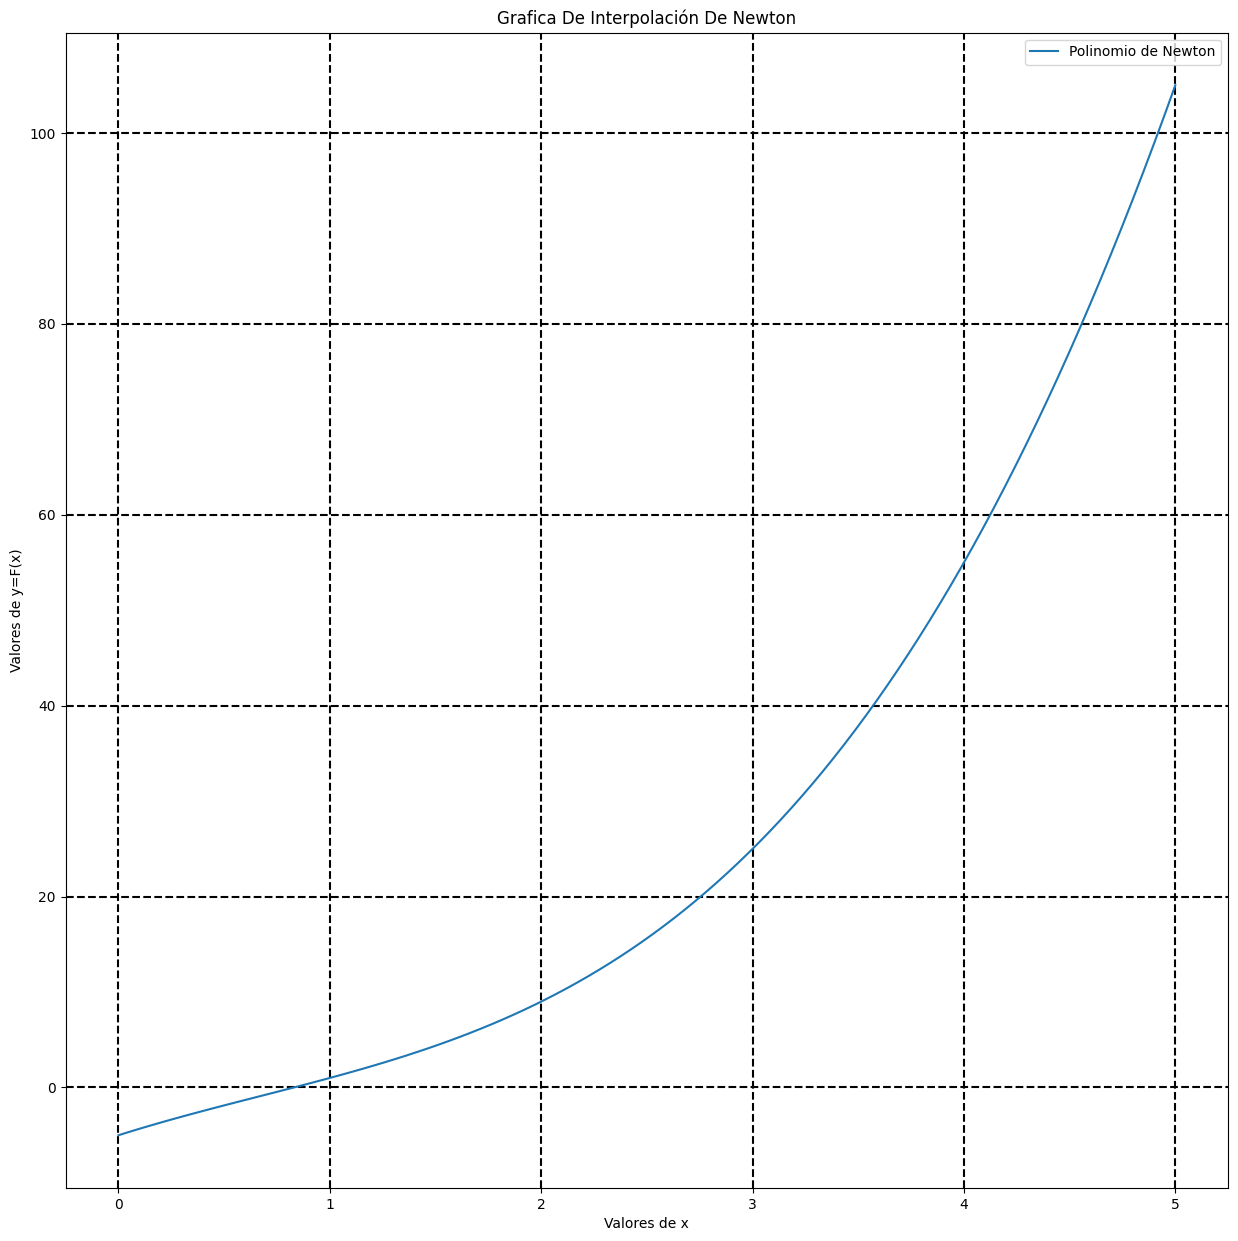

In [48]:
plt.figure(figsize=(15, 15))
plt.plot(x_range, y_interp, '-', label='Polinomio de Newton')  # Gráfica del polinomio
plt.xlabel('Valores de x')
plt.ylabel('Valores de y=F(x)')
plt.title('Grafica De Interpolación De Newton')
plt.legend()
plt.grid(True, color='black', linestyle='--', linewidth=1.5)
plt.show()

Y la grafica anterior muestra el grafico del $F(x)$, es decir, de la funcion que encontrariamos con el metodo de Interpolacion de Newton, que en este caso, no nos dedicaremos a encontrar.